In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
datasets = {
    "EV_Maker_by_Place": pd.read_csv("EV Maker by Place.csv"),
    "EV_Category": pd.read_csv("ev_cat_01-24.csv"),
    "EV_Sales_by_Makers_and_Cat": pd.read_csv("ev_sales_by_makers_and_cat_15-24.csv"),
    "Operational_PC": pd.read_csv("OperationalPC.csv"),
    "Vehicle_Class": pd.read_csv("Vehicle Class - All.csv"),
}

In [3]:
# Data Cleaning and Processing
datasets["EV_Category"]["Date"] = pd.to_datetime(datasets["EV_Category"]["Date"], errors='coerce')
datasets["Vehicle_Class"]["Total Registration"] = (
    datasets["Vehicle_Class"]["Total Registration"].astype(str).str.replace(',', '').astype(int)
)

<ipython-input-3-8b9f58a757dc>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datasets["EV_Category"]["Date"] = pd.to_datetime(datasets["EV_Category"]["Date"], errors='coerce')


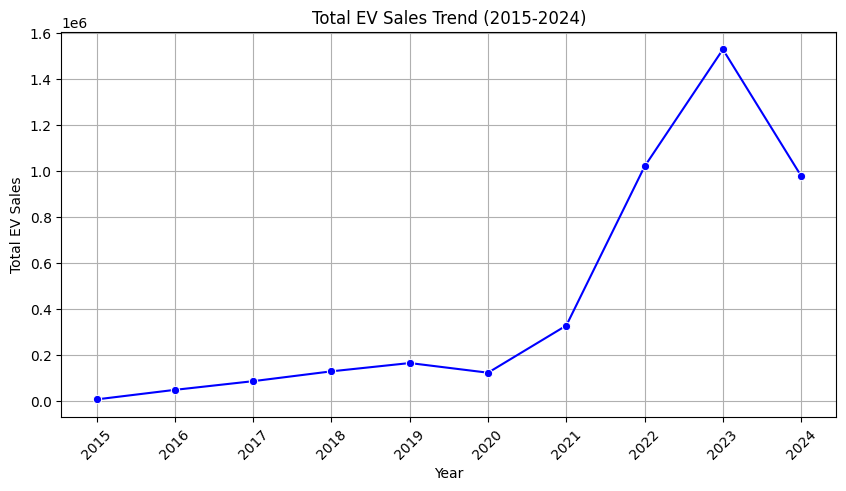

In [4]:
# EV Sales Trend
ev_sales = datasets["EV_Sales_by_Makers_and_Cat"].iloc[:, 2:].sum()
plt.figure(figsize=(10, 5))
sns.lineplot(x=ev_sales.index, y=ev_sales.values, marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Total EV Sales")
plt.title("Total EV Sales Trend (2015-2024)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

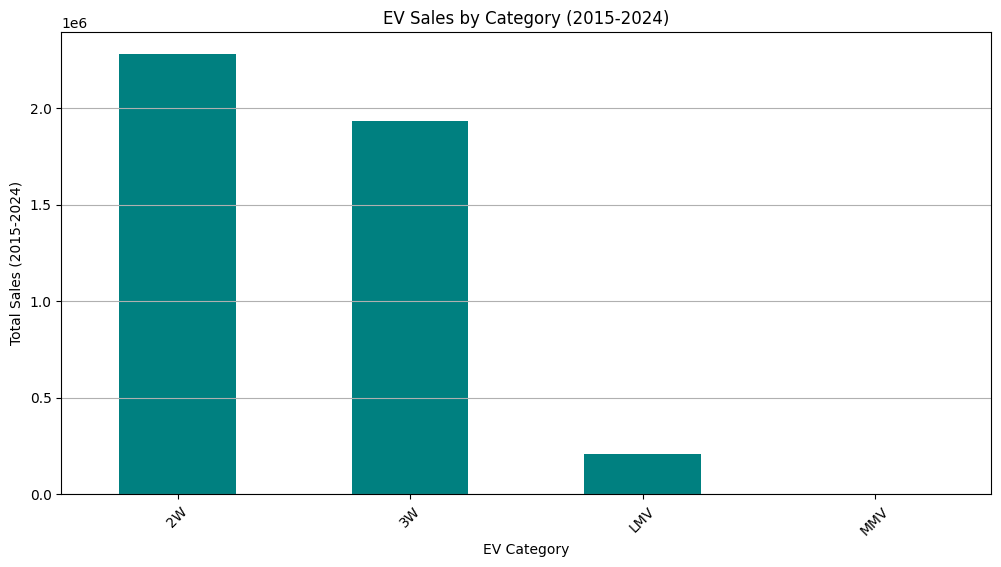

In [5]:
# EV Sales by Category
category_sales = datasets["EV_Sales_by_Makers_and_Cat"].groupby("Cat").sum().iloc[:, 1:].sum(axis=1)
plt.figure(figsize=(12, 6))
category_sales.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.xlabel("EV Category")
plt.ylabel("Total Sales (2015-2024)")
plt.title("EV Sales by Category (2015-2024)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

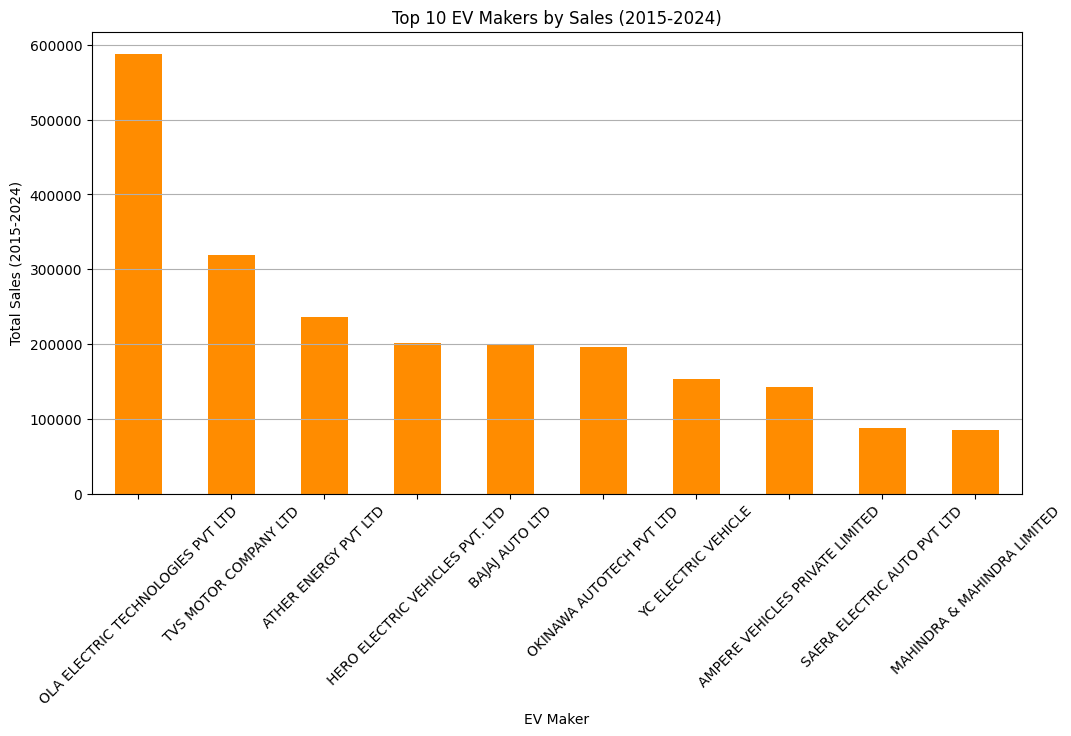

In [6]:
# Top Companies with Highest EV Sales
maker_sales = datasets["EV_Sales_by_Makers_and_Cat"].groupby("Maker").sum().iloc[:, 1:].sum(axis=1)
plt.figure(figsize=(12, 6))
maker_sales.sort_values(ascending=False).head(10).plot(kind='bar', color='darkorange')
plt.xlabel("EV Maker")
plt.ylabel("Total Sales (2015-2024)")
plt.title("Top 10 EV Makers by Sales (2015-2024)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<ipython-input-7-a9da35fcd6a5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=datasets["Operational_PC"]["State"], x=datasets["Operational_PC"]["No. of Operational PCS"], palette="viridis")


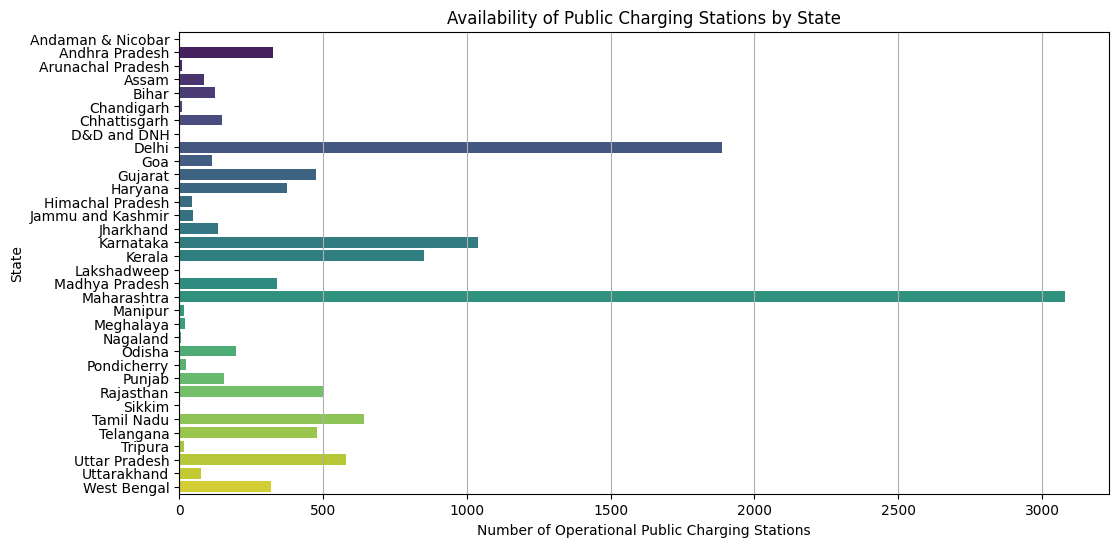

In [7]:
# Public Charging Stations by State
plt.figure(figsize=(12, 6))
sns.barplot(y=datasets["Operational_PC"]["State"], x=datasets["Operational_PC"]["No. of Operational PCS"], palette="viridis")
plt.xlabel("Number of Operational Public Charging Stations")
plt.ylabel("State")
plt.title("Availability of Public Charging Stations by State")
plt.grid(axis='x')
plt.show()

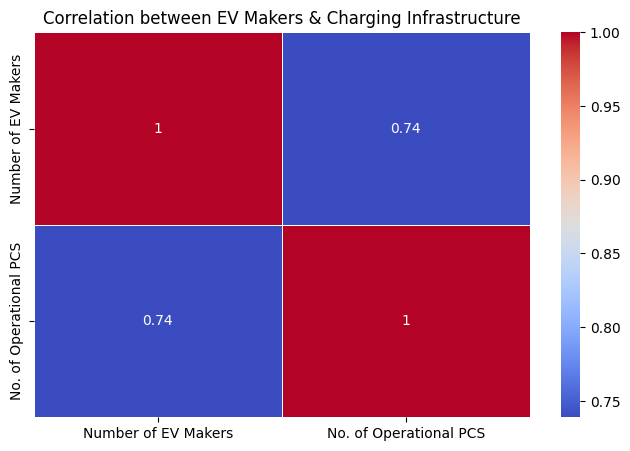

In [8]:
# Correlation between EV Makers & Charging Infrastructure
ev_maker_place = datasets["EV_Maker_by_Place"].groupby("State").size().reset_index(name="Number of EV Makers")
operational_pc = datasets["Operational_PC"]
ev_infra_data = pd.merge(ev_maker_place, operational_pc, on="State", how="inner")
corr_matrix = ev_infra_data.corr(numeric_only=True)
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between EV Makers & Charging Infrastructure")
plt.show()

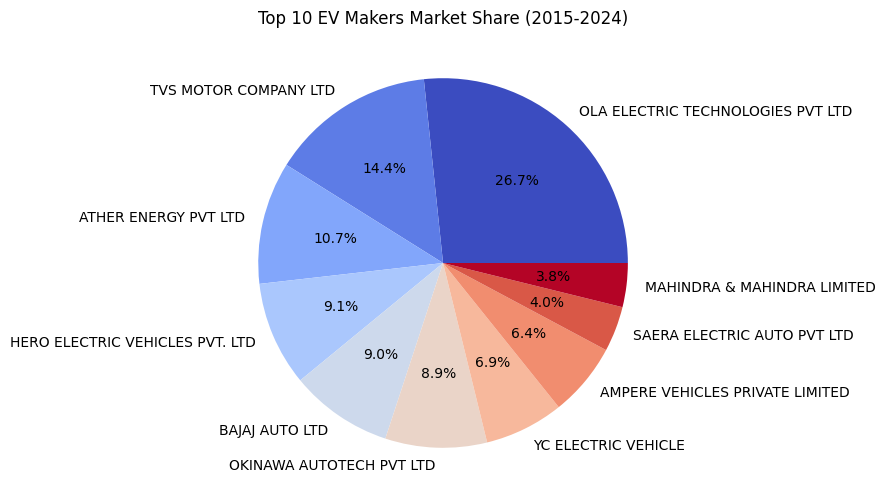

In [9]:
# EV Market Share by Manufacturer
total_sales = maker_sales.sum()
market_share = (maker_sales / total_sales) * 100
plt.figure(figsize=(12, 6))
market_share.sort_values(ascending=False).head(10).plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm')
plt.ylabel('')
plt.title("Top 10 EV Makers Market Share (2015-2024)")
plt.show()

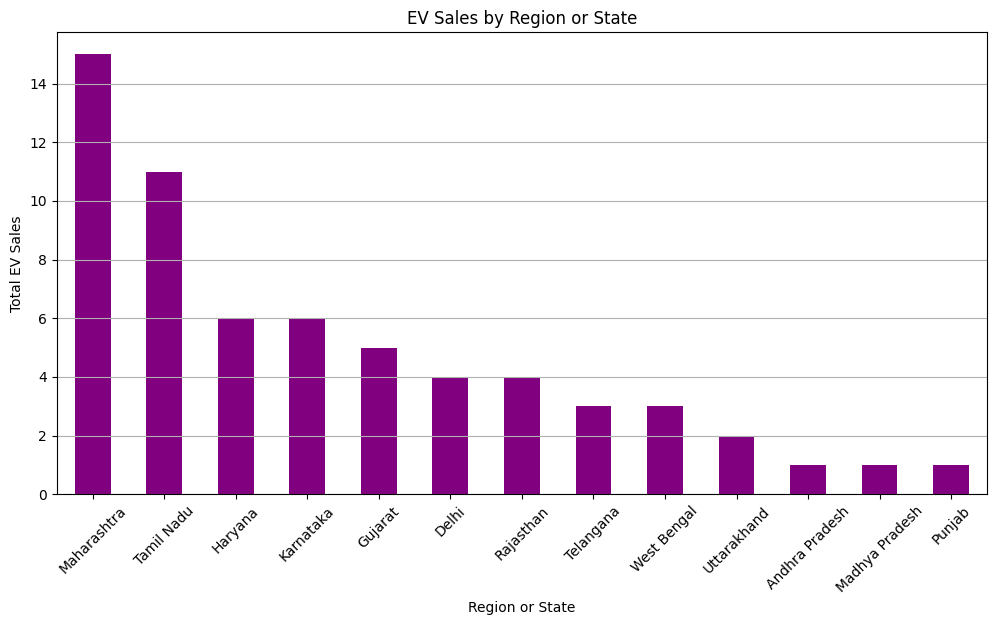

In [10]:
# EV Sales by Region
region_sales = datasets["EV_Maker_by_Place"].groupby("State").size()

plt.figure(figsize=(12, 6))
region_sales.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.xlabel("Region or State")  # Change label if using state
plt.ylabel("Total EV Sales")
plt.title("EV Sales by Region or State")  # Change title if using state
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

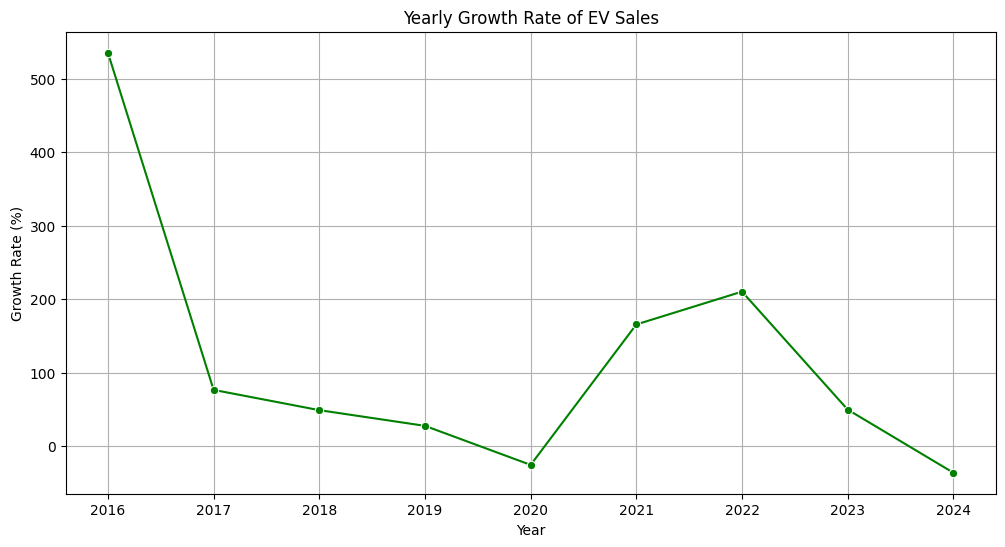

In [12]:
# Growth Rate of EV Adoption
# Assuming data is derived from 'EV_Sales_by_Makers_and_Cat' as in previous cells
data = datasets["EV_Sales_by_Makers_and_Cat"].iloc[:, 2:].sum().reset_index()
data.columns = ["Year", "Total_Sales"]
data["Year"] = data["Year"].astype(int)

# Now calculate and plot the growth rate
data["Growth Rate"] = data["Total_Sales"].pct_change() * 100
plt.figure(figsize=(12, 6))
sns.lineplot(x=data["Year"], y=data["Growth Rate"], marker='o', color='green')
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.title("Yearly Growth Rate of EV Sales")
plt.grid(True)
plt.show()

<ipython-input-13-a25bfed66845>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=datasets["Vehicle_Class"]["Vehicle Class"], x=datasets["Vehicle_Class"]["Total Registration"], palette="Blues")


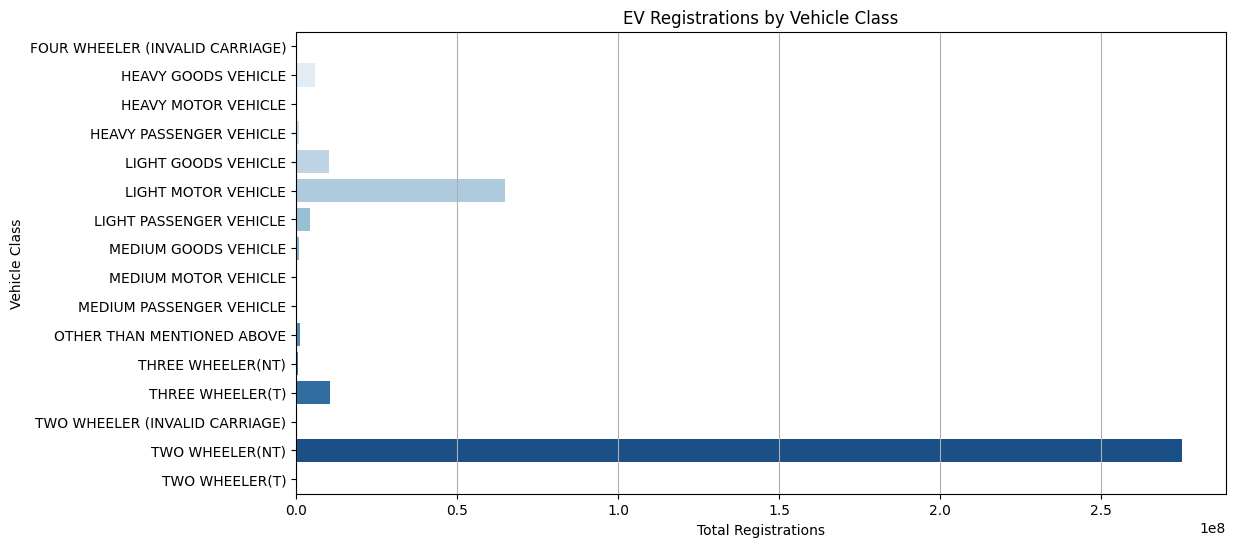

In [13]:
# Relationship Between Vehicle Class and Registration
plt.figure(figsize=(12, 6))
sns.barplot(y=datasets["Vehicle_Class"]["Vehicle Class"], x=datasets["Vehicle_Class"]["Total Registration"], palette="Blues")
plt.xlabel("Total Registrations")
plt.ylabel("Vehicle Class")
plt.title("EV Registrations by Vehicle Class")
plt.grid(axis='x')
plt.show()

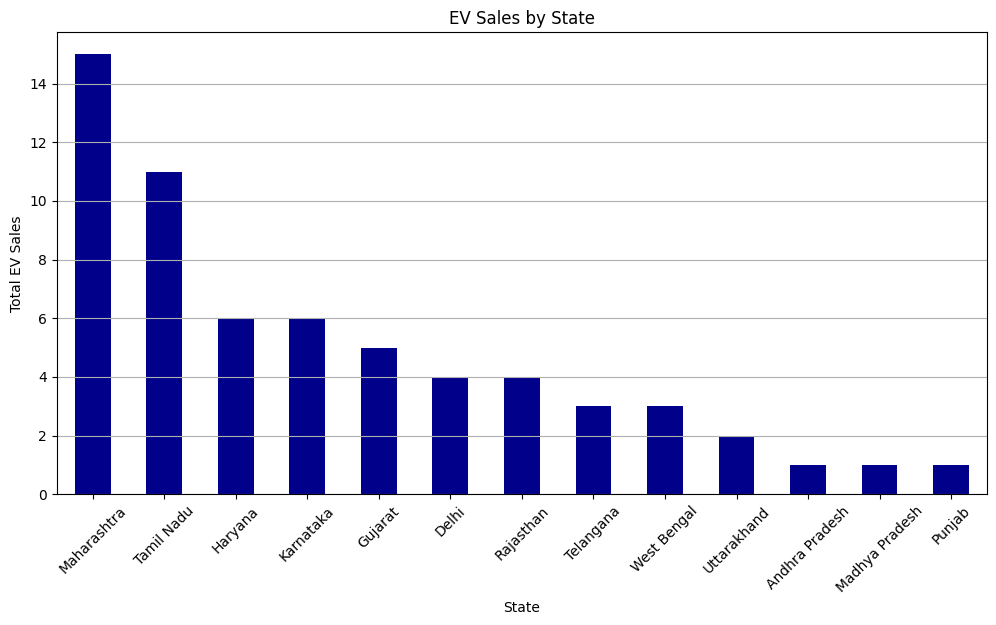

In [14]:
# EV Sales by State
state_sales = datasets["EV_Maker_by_Place"].groupby("State").size()
plt.figure(figsize=(12, 6))
state_sales.sort_values(ascending=False).plot(kind='bar', color='darkblue')
plt.xlabel("State")
plt.ylabel("Total EV Sales")
plt.title("EV Sales by State")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [15]:
# Predictive Model
data = datasets["EV_Sales_by_Makers_and_Cat"].iloc[:, 2:].sum().reset_index()
data.columns = ["Year", "Total_Sales"]
data["Year"] = data["Year"].astype(int)
X = data[["Year"]]
y = data["Total_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

future_years = pd.DataFrame({"Year": range(2025, 2031)})
future_sales_pred = model.predict(future_years)

# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output Predictions
print("Predicted EV Sales (2025-2030):", list(zip(future_years["Year"], future_sales_pred)))
print("Model Performance: MAE:", mae, "MSE:", mse, "R2 Score:", r2)

Predicted EV Sales (2025-2030): [(2025, 1017367.1810344756), (2026, 1137742.5775862038), (2027, 1258117.974137932), (2028, 1378493.3706896603), (2029, 1498868.7672413886), (2030, 1619244.163793087)]
Model Performance: MAE: 433939.0000000149 MSE: 289859113511.21545 R2 Score: 0.4706629124851869
